#### E. coli UTI/UR PTR analysis 

#### Sample Preparation

Exploring Sequencing Demultiplex file... 
Summary of % reads from the sequencing run...
count    9.600000e+01
mean     8.799024e+06
std      2.711577e+06
min      1.457406e+06
25%      7.284285e+06
50%      8.808374e+06
75%      1.074499e+07
max      1.581730e+07
Name: # Reads, dtype: float64


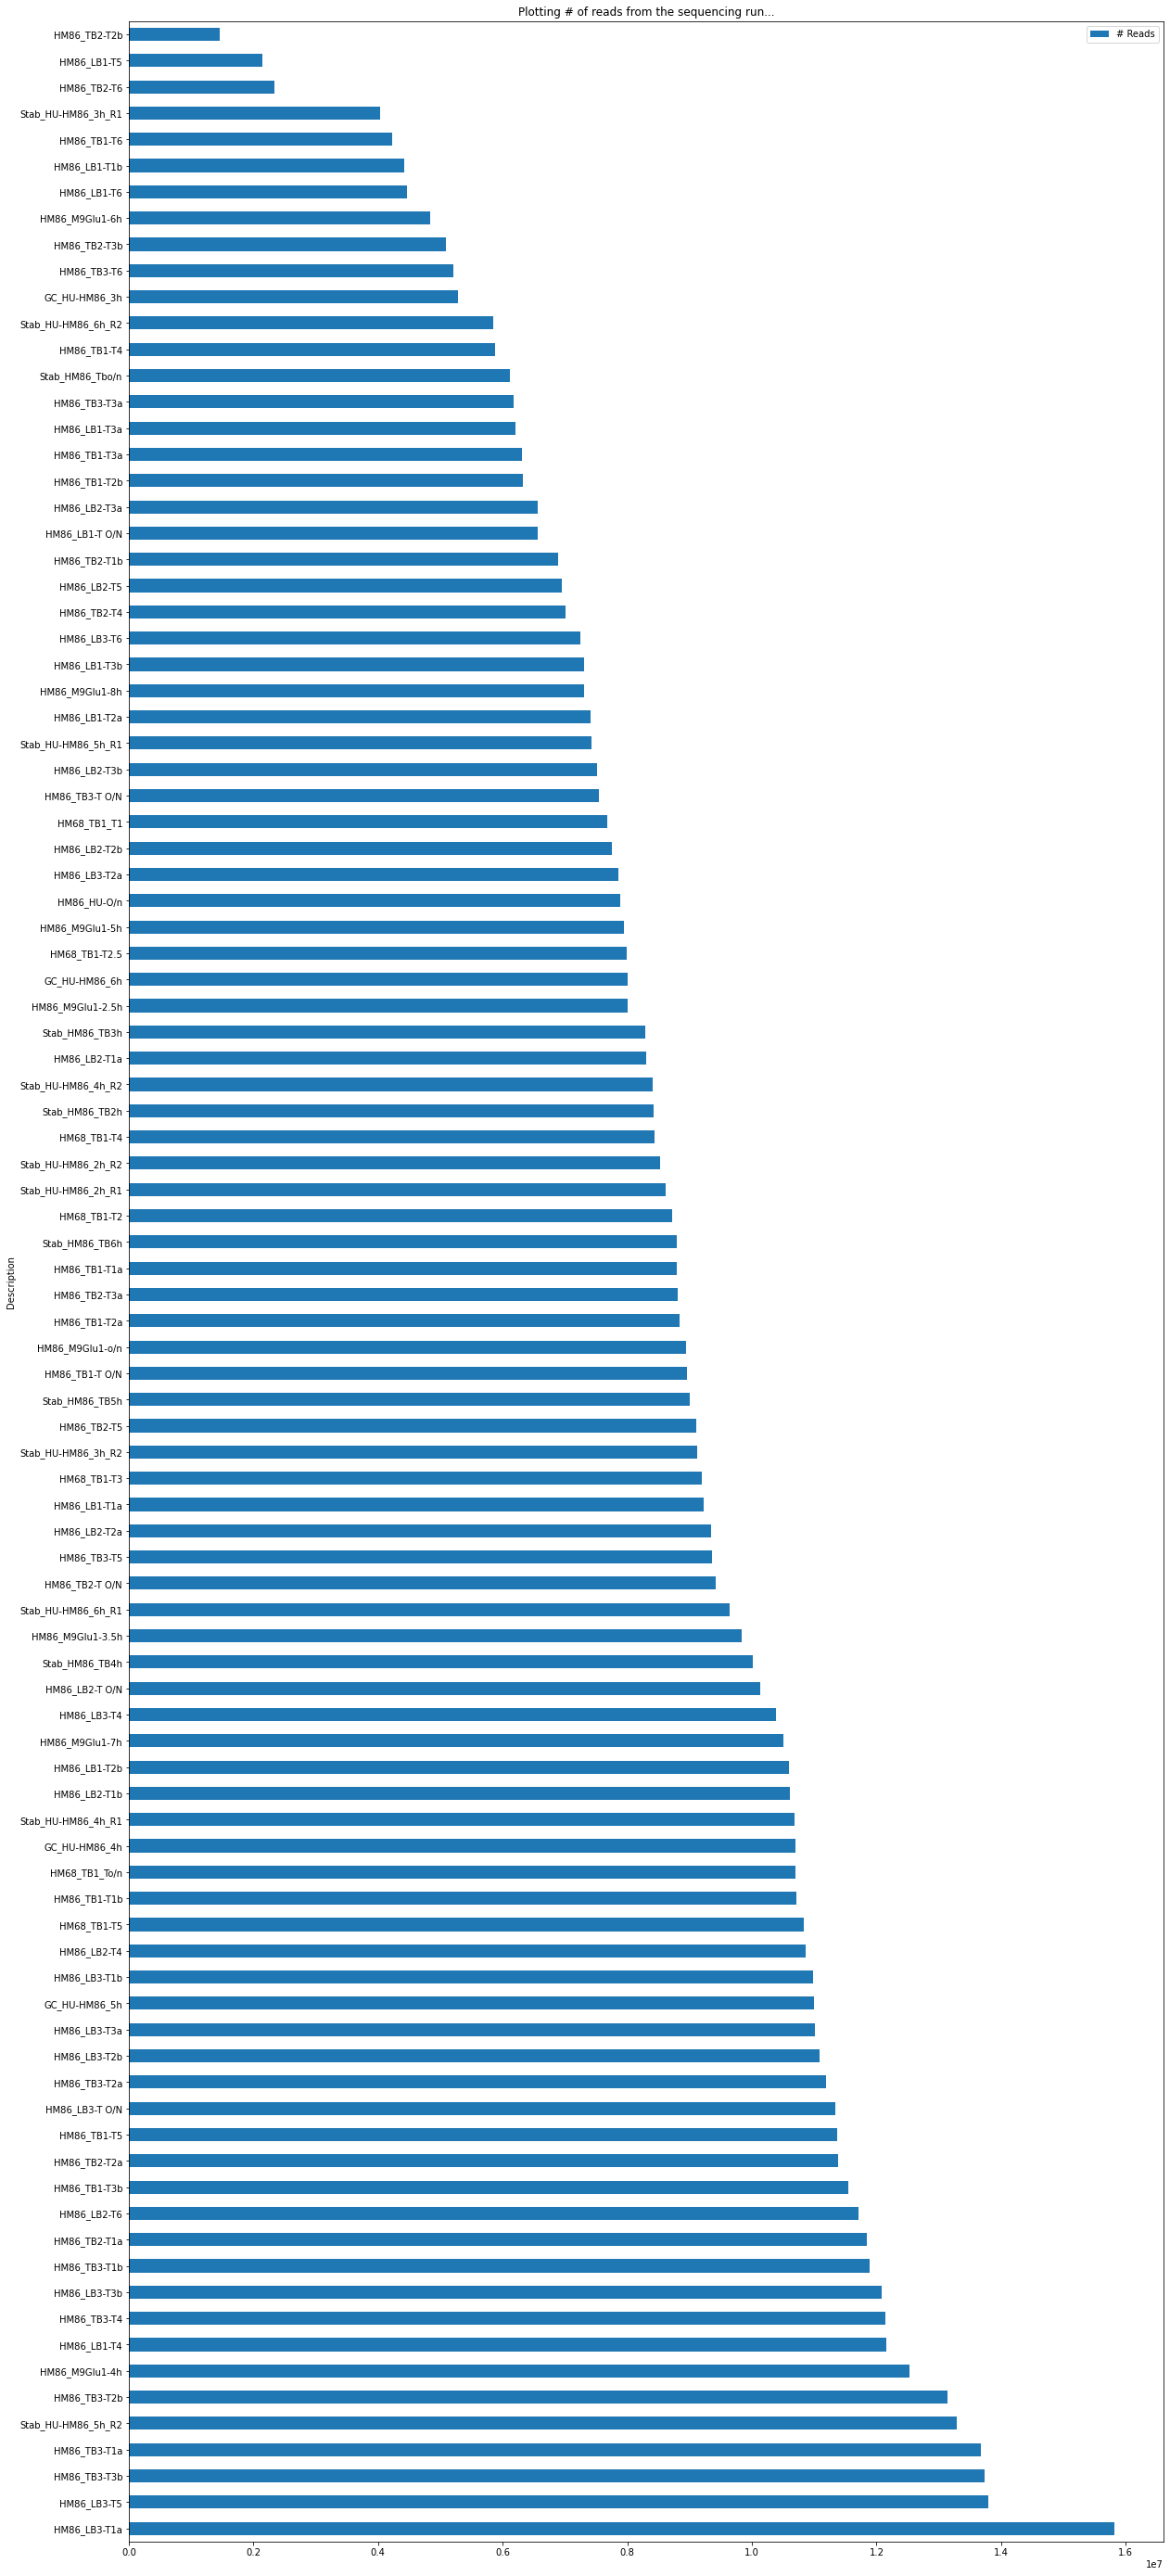

In [2]:
# Import Libraries and set path
import numpy as np
import pandas as pd
from IPython.display import HTML
import os
import readline
import argparse
from itertools import islice
import subprocess
# Set this option for pandas to print data
pd.set_option("display.max_rows", None, "display.max_columns", None)
os.chdir("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Sequence_data/fastq/8399-SP/fastqs_8399-SP")

print ("\033[1m" + "Exploring Sequencing Demultiplex file... "+ "\033[0m")
pd.set_option("display.max_rows", None, "display.max_columns", None)
Ecoli_Demultiplex = pd.read_csv("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Sequence_data/fastq/8399-SP/DemuxStats_8399-SP.csv", sep=',', header=0)

print ("\033[1m" + "Summary of % reads from the sequencing run..."+ "\033[0m")
print(Ecoli_Demultiplex['# Reads'].describe())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 50]
Ecoli_Demultiplex.sort_values(by='# Reads',ascending=False).plot(x='Description', y='# Reads', kind="barh", title="Plotting # of reads from the sequencing run...")

Ecoli_Demultiplex = Ecoli_Demultiplex.replace([' O/N'], '_O-N', regex=True)
Ecoli_Demultiplex = Ecoli_Demultiplex.replace(['o-n'], '_O-N', regex=True)
Ecoli_Demultiplex = Ecoli_Demultiplex.replace(['o/n'], '_O-N', regex=True)
Ecoli_Demultiplex = Ecoli_Demultiplex.replace(['-O/n'], '_O-N', regex=True)

# Rename the samples.
# os.chdir("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Sequence_data/fastq/8399-SP")
# for index, row in Ecoli_Demultiplex.iterrows():
#     print("mv", "%s_S*_R1_001.fastq.gz" % row['Sample_ID'], "%s_R1.fastq.gz" % row['Description'])
#     #os.system("mv %s_S*_R1_001.fastq.gz %s_R1.fastq.gz" % (row['Sample_ID'], row['Description']))
# for index, row in Ecoli_Demultiplex.iterrows():
#     print("mv", "%s_S*R2_001.fastq.gz" % row['Sample_ID'], "%s_R2.fastq.gz" % row['Description'])
#     #os.system("mv %s_S*_R2_001.fastq.gz %s_R2.fastq.gz" % (row['Sample_ID'], row['Description']))

In [3]:
os.chdir("/scratch/esnitkin_root/esnitkin/apirani/Project_UTI_PTR/Analysis/2023-06-21_QC_analysis/")

#### Evaluate Raw Sequencing Coverage 

In [4]:
Coverage = pd.read_csv("2023-06-21_QC_analysis_Final_Coverage.txt", sep=',', header=0)
Coverage = Coverage.replace(['_R1.fastq.gz'], '', regex=True)
Coverage['Coverage'].describe()

count     96.000000
mean     532.979441
std      161.430097
min       88.027300
25%      439.971000
50%      532.026000
75%      648.997500
max      955.365000
Name: Coverage, dtype: float64

Exploring Coverage for all samples: 


<AxesSubplot:ylabel='Sample_name'>

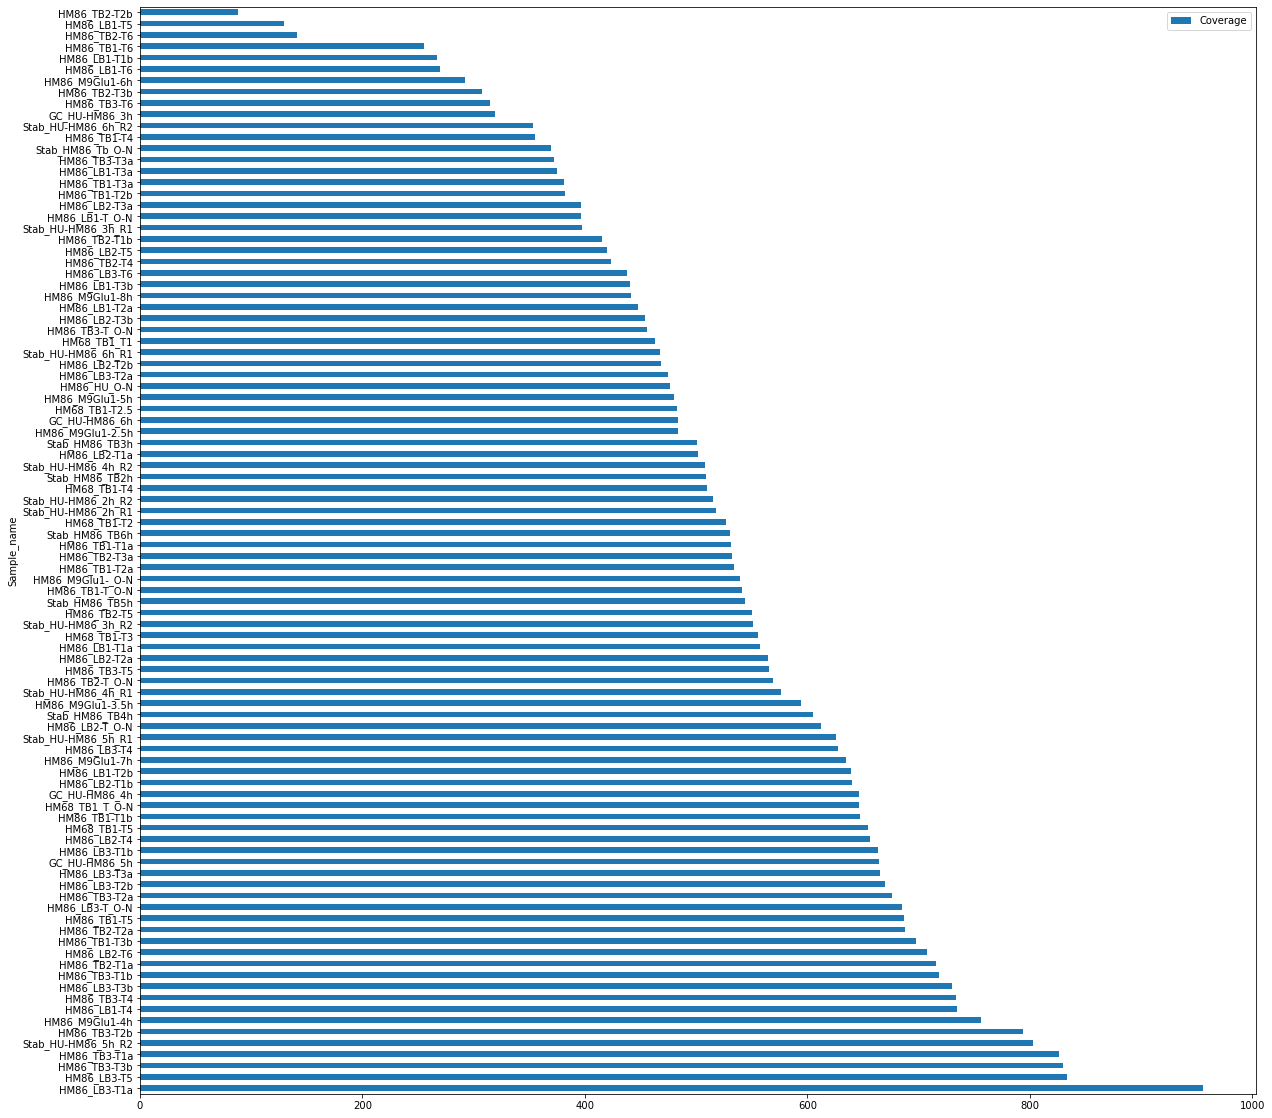

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
print ("\033[1m" + "Exploring Coverage for all samples: "+ "\033[0m")
Coverage.sort_values(by='Coverage',ascending=False).plot(x='Sample_name', y='Coverage', kind="barh")

#### Kraken Report

In [6]:
os.chdir("2023-06-21_QC_analysis_Kraken_results/")

In [8]:
kraken = pd.read_csv("Kraken_report_final.csv", sep=',', header=0)
kraken = kraken.replace(['_R1.fastq.gz'], '', regex=True)
kraken.rename(columns = {'Sample':'Sample_name'}, inplace = True)

In [10]:
print ("\033[1m" + "Species\tCount" + "\033[0m")
kraken['Species'].value_counts()

Species	Count


Escherichiacoli    96
Name: Species, dtype: int64

#### FastQC and MultiQC Analysis

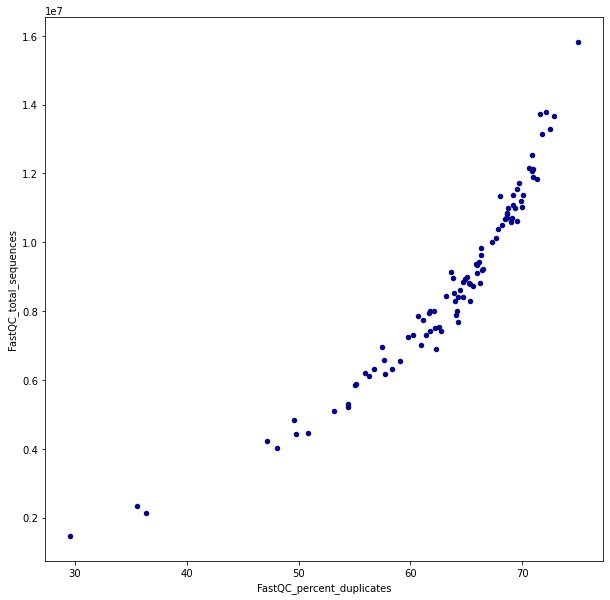

In [16]:
os.chdir("/scratch/esnitkin_root/esnitkin/apirani/Project_UTI_PTR/Analysis/2023-06-21_QC_analysis/")
multiqc_summary = pd.read_csv("2023-06-21_QC_analysis_Multiqc_reports/2023-06-21_QC_analysis_Forward_fastqc_data/multiqc_general_stats.txt", sep='\t', header=0)
multiqc_summary.columns = ['Sample_name', 'FastQC_percent_duplicates', 'FastQC_percent_gc', 'FastQC_avg_sequence_length', 'FastQC_total_sequences', 'FastQC_percent_fails']
#multiqc_summary
multiqc_summary = multiqc_summary[~multiqc_summary['Sample_name'].str.contains("NEG")]
multiqc_summary = multiqc_summary[~multiqc_summary['Sample_name'].str.contains("LVU")]
multiqc_summary = multiqc_summary[~multiqc_summary['Sample_name'].str.contains("NK_SK")]
multiqc_summary = multiqc_summary.replace(['_R1'], '', regex=True)
plt.rcParams['figure.figsize'] = [10, 10]
ax1 = multiqc_summary.plot.scatter(x = 'FastQC_percent_duplicates', y = 'FastQC_total_sequences', c = 'DarkBlue')

#### PTR Analysis

    Note:

        - Rewrote PTR code and transformed into a snakemake workflow.

        - The snakemake workflow can be found at https://github.com/alipirani88/Growth-rate-estimate_SMAKE

        - PTR results can be found at: /nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/results/2023-06-23_Growth_Rate_Analysis/
        
        - PTR report for the 96 samples - Growth-rate-estimate_SMAKE_PTR_data.csv
        
        - Working on code changes to calculate PTR for just the Ori/Ter sites.

gs: /sw/pkgs/coe/o/image-libraries/220318/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


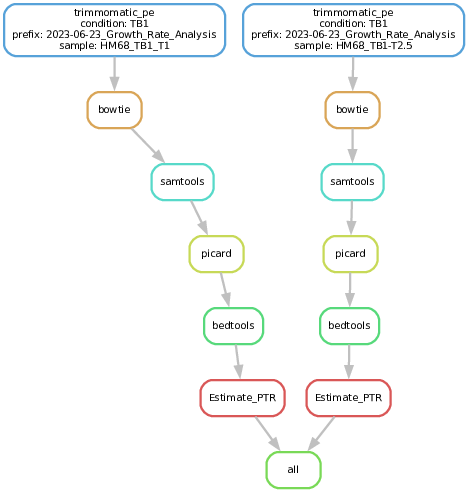

In [5]:
from wand.image import Image as WImage
img = WImage(filename='/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/dag.pdf')
img

In [71]:
# Import Libraries and set path
import numpy as np
import pandas as pd
from IPython.display import HTML
import os
import readline
import argparse
from itertools import islice
import subprocess
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
# Set this option for pandas to print data
pd.set_option("display.max_rows", None, "display.max_columns", None)
os.chdir("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/results/2023-06-23_Growth_Rate_Analysis/ptr/")

In [79]:
PTR_results = pd.read_csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/Growth-rate-estimate_SMAKE_PTR_data.csv')

In [80]:
PTR_results

,sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome PTR,Ori/Ter PTR
0,GC_HU-HM86_3h,HM86,GC_HU,3h,a,GC_HU-HM86_3h_R1.fastq.gz,GC_HU-HM86_3h_R2.fastq.gz,1.266543,NaN
1,GC_HU-HM86_4h,HM86,GC_HU,4h,a,GC_HU-HM86_4h_R1.fastq.gz,GC_HU-HM86_4h_R2.fastq.gz,1.100740,NaN
2,GC_HU-HM86_5h,HM86,GC_HU,5h,a,GC_HU-HM86_5h_R1.fastq.gz,GC_HU-HM86_5h_R2.fastq.gz,1.090105,NaN
3,GC_HU-HM86_6h,HM86,GC_HU,6h,a,GC_HU-HM86_6h_R1.fastq.gz,GC_HU-HM86_6h_R2.fastq.gz,1.079097,NaN
4,HM68_TB1_T1,HM68,TB1,T1,a,HM68_TB1_T1_R1.fastq.gz,HM68_TB1_T1_R2.fastq.gz,1.811068,NaN
5,HM68_TB1-T2.5,HM68,TB1,T2.5,a,HM68_TB1-T2.5_R1.fastq.gz,HM68_TB1-T2.5_R2.fastq.gz,1.346628,NaN
6,HM68_TB1-T2,HM68,TB1,T2,a,HM68_TB1-T2_R1.fastq.gz,HM68_TB1-T2_R2.fastq.gz,1.611574,NaN
7,HM68_TB1-T3,HM68,TB1,T3,a,HM68_TB1-T3_R1.fastq.gz,HM68_TB1-T3_R2.fastq.gz,1.248157,NaN
8,HM68_TB1-T4,HM68,TB1,T4,a,HM68_TB1-T4_R1.fastq.gz,HM68_TB1-T4_R2.fastq.gz,1.141269,NaN
9,HM68_TB1-T5,HM68,TB1,T5,a,HM68_TB1-T5_R1.fastq.gz,HM68_TB1-T5_R2.fastq.gz,1.111355,NaN


#### Human Urine Growth Curve

In [72]:
GC_HU_HM86_3h = pd.read_csv('GC_HU/GC_HU-HM86_3h/GC_HU-HM86_3h.bed_perc_bins.csv', names=['bin', 'GC_HU_HM86_3h'], header=None)
GC_HU_HM86_4h = pd.read_csv('GC_HU/GC_HU-HM86_4h/GC_HU-HM86_4h.bed_perc_bins.csv', names=['bin', 'GC_HU_HM86_4h'], header=None)
GC_HU_HM86_5h = pd.read_csv('GC_HU/GC_HU-HM86_5h/GC_HU-HM86_5h.bed_perc_bins.csv', names=['bin', 'GC_HU_HM86_5h'], header=None)
GC_HU_HM86_6h = pd.read_csv('GC_HU/GC_HU-HM86_6h/GC_HU-HM86_6h.bed_perc_bins.csv', names=['bin', 'GC_HU_HM86_6h'], header=None)
HM86_HU_O_N = pd.read_csv('HU/HM86_HU_O-N/HM86_HU_O-N.bed_perc_bins.csv', names=['bin', 'HM86_HU_O_N'], header=None)

In [74]:
!grep 'median_sliding_window_array' GC_HU/GC_HU-HM86_*/*_PTR.txt HU/HM86_HU_O-N/HM86_HU_O-N_bins_PTR.txt

GC_HU/GC_HU-HM86_3h/GC_HU-HM86_3h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/GC_HU/GC_HU-HM86_3h/GC_HU-HM86_3h_bins.csv median_sliding_window_array :	1.266543076722269
GC_HU/GC_HU-HM86_4h/GC_HU-HM86_4h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/GC_HU/GC_HU-HM86_4h/GC_HU-HM86_4h_bins.csv median_sliding_window_array :	1.10073982300437
GC_HU/GC_HU-HM86_5h/GC_HU-HM86_5h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/GC_HU/GC_HU-HM86_5h/GC_HU-HM86_5h_bins.csv median_sliding_window_array :	1.0901051448422578
GC_HU/GC_HU-HM86_6h/GC_HU-HM86_6h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/GC_HU/GC_HU-HM86_6h/GC_HU-HM86_6h_bins.csv median_sliding_window_array :	1.0790968542302446
HU/HM86_HU_O-N/HM86_HU_O-N_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/HU/HM86_HU_O-N/HM86_HU_O-N_bins.csv median_sliding_window_array :	1.079954713122238


In [75]:
GC_HU_HM86_temp1 = pd.merge(GC_HU_HM86_3h, GC_HU_HM86_4h, on=["bin", "bin"])
GC_HU_HM86_temp2 = pd.merge(GC_HU_HM86_temp1, GC_HU_HM86_5h, on=["bin", "bin"])
GC_HU_HM86_temp3 = pd.merge(GC_HU_HM86_temp2, GC_HU_HM86_6h, on=["bin", "bin"])
GC_HU_HM86 = pd.merge(GC_HU_HM86_temp3, HM86_HU_O_N, on=["bin", "bin"])

In [76]:
GC_HU_HM86 = GC_HU_HM86.iloc[1:]

In [77]:
GC_HU_HM86['GC_HU_HM86_3h']=GC_HU_HM86['GC_HU_HM86_3h'].astype(float)
GC_HU_HM86['GC_HU_HM86_4h']=GC_HU_HM86['GC_HU_HM86_4h'].astype(float)
GC_HU_HM86['GC_HU_HM86_5h']=GC_HU_HM86['GC_HU_HM86_5h'].astype(float)
GC_HU_HM86['GC_HU_HM86_6h']=GC_HU_HM86['GC_HU_HM86_6h'].astype(float)
GC_HU_HM86['HM86_HU_O_N']=GC_HU_HM86['HM86_HU_O_N'].astype(float)

Text(250, 29, 'HM86_HU_O_N = 1.079954713122238')

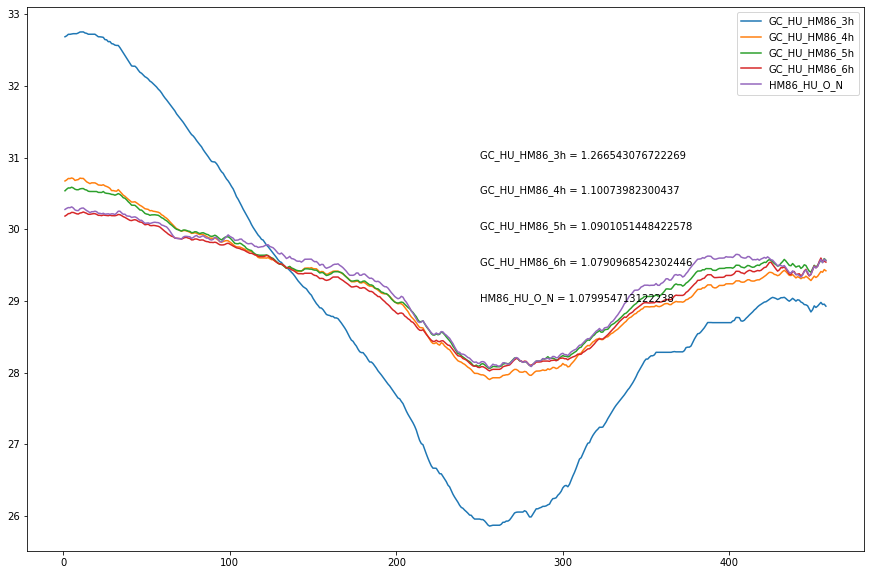

In [78]:
fig, ax = plt.subplots(1, 1)
GC_HU_HM86.plot(legend=True, ax=ax)
ax.text(250, 31, 'GC_HU_HM86_3h = 1.266543076722269', fontsize = 10)
ax.text(250, 30.5, 'GC_HU_HM86_4h = 1.10073982300437', fontsize = 10)
ax.text(250, 30, 'GC_HU_HM86_5h = 1.0901051448422578', fontsize = 10)
ax.text(250, 29.5, 'GC_HU_HM86_6h = 1.0790968542302446', fontsize = 10)
ax.text(250, 29, 'HM86_HU_O_N = 1.079954713122238', fontsize = 10)

#### Terrific Broth

In [79]:
HM68_TB1_T1 = pd.read_csv('TB1/HM68_TB1_T1/HM68_TB1_T1.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T1'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T2 = pd.read_csv('TB1/HM68_TB1-T2/HM68_TB1-T2.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T2'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T2_5 = pd.read_csv('TB1/HM68_TB1-T2.5/HM68_TB1-T2.5.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T2_5'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T3 = pd.read_csv('TB1/HM68_TB1-T3/HM68_TB1-T3.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T3'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T4 = pd.read_csv('TB1/HM68_TB1-T4/HM68_TB1-T4.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T4'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T5 = pd.read_csv('TB1/HM68_TB1-T5/HM68_TB1-T5.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T5'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T_O_N = pd.read_csv('TB1/HM68_TB1_T_O-N/HM68_TB1_T_O-N.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T_O_N'], header=None, dtype=float, skiprows=[0])

In [80]:
!grep 'median_sliding_window_array' TB1/*/*bins_PTR.txt

TB1/HM68_TB1_T1/HM68_TB1_T1_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM68_TB1_T1/HM68_TB1_T1_bins.csv median_sliding_window_array :	1.8110683207486586
TB1/HM68_TB1-T2.5/HM68_TB1-T2.5_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM68_TB1-T2.5/HM68_TB1-T2.5_bins.csv median_sliding_window_array :	1.3466276898471339
TB1/HM68_TB1-T2/HM68_TB1-T2_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM68_TB1-T2/HM68_TB1-T2_bins.csv median_sliding_window_array :	1.611574016119998
TB1/HM68_TB1-T3/HM68_TB1-T3_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM68_TB1-T3/HM68_TB1-T3_bins.csv median_sliding_window_array :	1.2481569340368612
TB1/HM68_TB1-T4/HM68_TB1-T4_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM68_TB1-T4/HM68_TB1-T4_bins.csv median_sliding_window_array :	1.1412694654882154
TB1/HM68_TB1-T5/HM68_TB1-T5_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM68_TB1-T5/HM68_TB1-T5_bins.csv median_sliding_w

In [74]:
HM68_TB1_temp1 = pd.merge(HM68_TB1_T1, HM68_TB1_T2, on=["bin", "bin"])
HM68_TB1_temp2 = pd.merge(HM68_TB1_temp1, HM68_TB1_T2_5, on=["bin", "bin"])
HM68_TB1_temp3 = pd.merge(HM68_TB1_temp2, HM68_TB1_T3, on=["bin", "bin"])
HM68_TB1_temp4 = pd.merge(HM68_TB1_temp3, HM68_TB1_T4, on=["bin", "bin"])
HM68_TB1_temp5 = pd.merge(HM68_TB1_temp4, HM68_TB1_T5, on=["bin", "bin"])
HM68_TB1 = pd.merge(HM68_TB1_temp5, HM68_TB1_T_O_N, on=["bin", "bin"])


In [89]:
HM68_TB1['HM68_TB1_T1']=HM68_TB1['HM68_TB1_T1'].astype(float)
HM68_TB1['HM68_TB1_T2']=HM68_TB1['HM68_TB1_T2'].astype(float)
HM68_TB1['HM68_TB1_T2_5']=HM68_TB1['HM68_TB1_T2_5'].astype(float)
HM68_TB1['HM68_TB1_T3']=HM68_TB1['HM68_TB1_T3'].astype(float)
HM68_TB1['HM68_TB1_T4']=HM68_TB1['HM68_TB1_T4'].astype(float)
HM68_TB1['HM68_TB1_T5']=HM68_TB1['HM68_TB1_T5'].astype(float)
HM68_TB1['HM68_TB1_T_O_N']=HM68_TB1['HM68_TB1_T_O_N'].astype(float)

Text(350, 29, 'HM68_TB1_T_O_N = 1.297023736132115')

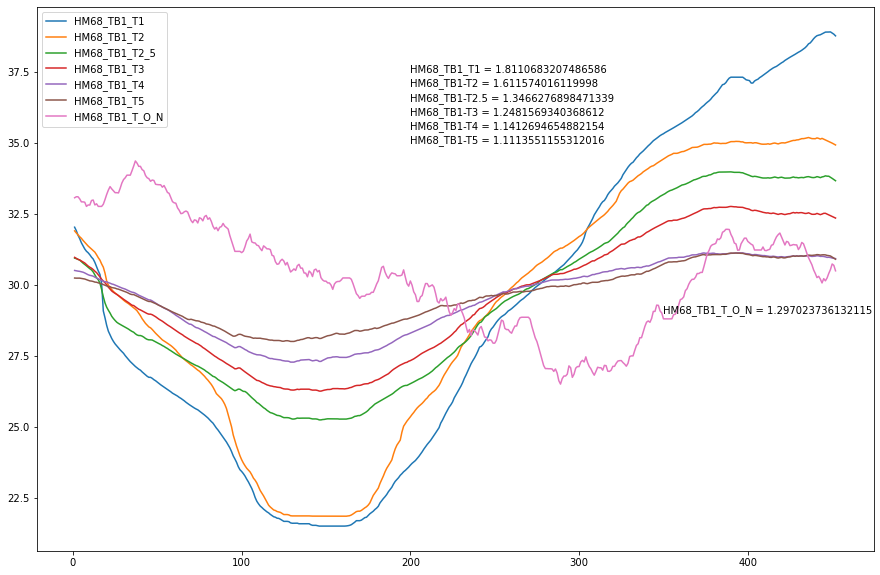

In [99]:
fig, ax = plt.subplots(1, 1)
HM68_TB1.plot(legend=True, ax=ax)
ax.text(200, 37.5, 'HM68_TB1_T1 = 1.8110683207486586', fontsize = 10)
ax.text(200, 36.5, 'HM68_TB1-T2.5 = 1.3466276898471339', fontsize = 10)
ax.text(200, 37, 'HM68_TB1-T2 = 1.611574016119998', fontsize = 10)
ax.text(200, 36, 'HM68_TB1-T3 = 1.2481569340368612', fontsize = 10)
ax.text(200, 35.5, 'HM68_TB1-T4 = 1.1412694654882154', fontsize = 10)
ax.text(200, 35, 'HM68_TB1-T5 = 1.1113551155312016', fontsize = 10)
ax.text(350, 29, 'HM68_TB1_T_O_N = 1.297023736132115', fontsize = 10)

In [19]:
HM86_TB1_T1a = pd.read_csv('TB1/HM86_TB1-T1a/HM86_TB1-T1a.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T1a'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T1b = pd.read_csv('TB1/HM86_TB1-T1b/HM86_TB1-T1b.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T1b'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T1 = pd.merge(HM86_TB1_T1a, HM86_TB1_T1b, on=["bin", "bin"])
HM86_TB1_T1_mean = HM86_TB1_T1[['HM86_TB1_T1a', 'HM68_TB1_T1b']].mean(axis=1)

HM86_TB1_T2a = pd.read_csv('TB1/HM86_TB1-T2a/HM86_TB1-T2a.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T2a'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T2b = pd.read_csv('TB1/HM86_TB1-T2b/HM86_TB1-T2b.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T2b'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T2 = pd.merge(HM86_TB1_T2a, HM86_TB1_T2b, on=["bin", "bin"])
HM86_TB1_T2_mean = HM86_TB1_T2[['HM86_TB1_T2a', 'HM68_TB1_T2b']].mean(axis=1)

HM86_TB1_T3a = pd.read_csv('TB1/HM86_TB1-T3a/HM86_TB1-T3a.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T3a'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T3b = pd.read_csv('TB1/HM86_TB1-T3b/HM86_TB1-T3b.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T3b'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T3 = pd.merge(HM86_TB1_T3a, HM86_TB1_T3b, on=["bin", "bin"])
HM86_TB1_T3_mean = HM86_TB1_T3[['HM86_TB1_T3a', 'HM68_TB1_T3b']].mean(axis=1)

HM86_TB1_T4 = pd.read_csv('TB1/HM86_TB1-T4/HM86_TB1-T4.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T4'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T5 = pd.read_csv('TB1/HM86_TB1-T5/HM86_TB1-T5.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T5'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T6 = pd.read_csv('TB1/HM86_TB1-T6/HM86_TB1-T6.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T6'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T_O_N = pd.read_csv('TB1/HM86_TB1-T_O-N/HM86_TB1-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T_O_N'], header=None, dtype=float, skiprows=[0])

In [21]:
!grep 'median_sliding_window_array' TB1/HM86*/*bins_PTR.txt

TB1/HM86_TB1-T1a/HM86_TB1-T1a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM86_TB1-T1a/HM86_TB1-T1a_bins.csv median_sliding_window_array :	1.65847891013932
TB1/HM86_TB1-T1b/HM86_TB1-T1b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM86_TB1-T1b/HM86_TB1-T1b_bins.csv median_sliding_window_array :	1.667008595786482
TB1/HM86_TB1-T2a/HM86_TB1-T2a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM86_TB1-T2a/HM86_TB1-T2a_bins.csv median_sliding_window_array :	1.5378885786556458
TB1/HM86_TB1-T2b/HM86_TB1-T2b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM86_TB1-T2b/HM86_TB1-T2b_bins.csv median_sliding_window_array :	1.4350228081534888
TB1/HM86_TB1-T3a/HM86_TB1-T3a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM86_TB1-T3a/HM86_TB1-T3a_bins.csv median_sliding_window_array :	1.3362261778377877
TB1/HM86_TB1-T3b/HM86_TB1-T3b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB1/HM86_TB1-T3b/HM86_TB1-T3b_bins.csv me

Text(200, 32, 'HM86_TB1_T_O_N = 1.106648936539763')

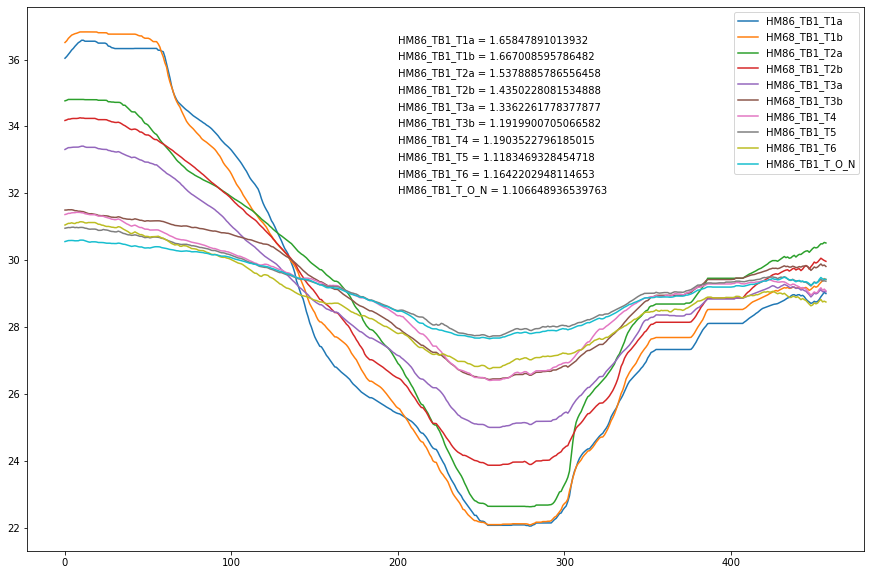

In [24]:
fig, ax = plt.subplots(1, 1)
HM86_TB1.plot(legend=True, ax=ax)
ax.text(200, 36.5, 'HM86_TB1_T1a = 1.65847891013932', fontsize = 10)
ax.text(200, 36, 'HM86_TB1_T1b = 1.667008595786482', fontsize = 10)
ax.text(200, 35.5, 'HM86_TB1_T2a = 1.5378885786556458', fontsize = 10)
ax.text(200, 35, 'HM86_TB1_T2b = 1.4350228081534888', fontsize = 10)
ax.text(200, 34.5, 'HM86_TB1_T3a = 1.3362261778377877', fontsize = 10)
ax.text(200, 34, 'HM86_TB1_T3b = 1.1919900705066582', fontsize = 10)
ax.text(200, 33.5, 'HM86_TB1_T4 = 1.1903522796185015', fontsize = 10)
ax.text(200, 33, 'HM86_TB1_T5 = 1.1183469328454718', fontsize = 10)
ax.text(200, 32.5, 'HM86_TB1_T6 = 1.1642202948114653', fontsize = 10)
ax.text(200, 32, 'HM86_TB1_T_O_N = 1.106648936539763', fontsize = 10)

TB2/HM86_TB2-T1a/HM86_TB2-T1a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB2/HM86_TB2-T1a/HM86_TB2-T1a_bins.csv median_sliding_window_array :	1.6511244004235968
TB2/HM86_TB2-T1b/HM86_TB2-T1b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB2/HM86_TB2-T1b/HM86_TB2-T1b_bins.csv median_sliding_window_array :	1.8278693472753733
TB2/HM86_TB2-T2a/HM86_TB2-T2a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB2/HM86_TB2-T2a/HM86_TB2-T2a_bins.csv median_sliding_window_array :	1.552473291328062
TB2/HM86_TB2-T2b/HM86_TB2-T2b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB2/HM86_TB2-T2b/HM86_TB2-T2b_bins.csv median_sliding_window_array :	1.7362328568595444
TB2/HM86_TB2-T3a/HM86_TB2-T3a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB2/HM86_TB2-T3a/HM86_TB2-T3a_bins.csv median_sliding_window_array :	1.3289397716681288
TB2/HM86_TB2-T3b/HM86_TB2-T3b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB2/HM86_TB2-T3b/HM86_TB2-T3b_bins.csv 

Text(200, 32, 'HM86_TB2_T_O_N = 1.1184945622274383')

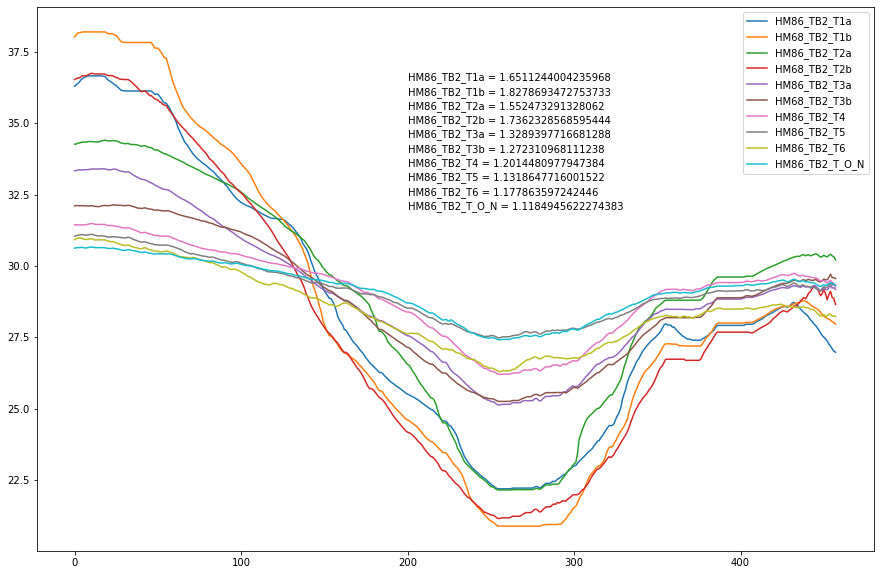

In [29]:
HM86_TB2_T1a = pd.read_csv('TB2/HM86_TB2-T1a/HM86_TB2-T1a.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T1a'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T1b = pd.read_csv('TB2/HM86_TB2-T1b/HM86_TB2-T1b.bed_perc_bins.csv', names=['bin', 'HM68_TB2_T1b'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T1 = pd.merge(HM86_TB2_T1a, HM86_TB2_T1b, on=["bin", "bin"])
HM86_TB2_T1_mean = HM86_TB2_T1[['HM86_TB2_T1a', 'HM68_TB2_T1b']].mean(axis=1)

HM86_TB2_T2a = pd.read_csv('TB2/HM86_TB2-T2a/HM86_TB2-T2a.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T2a'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T2b = pd.read_csv('TB2/HM86_TB2-T2b/HM86_TB2-T2b.bed_perc_bins.csv', names=['bin', 'HM68_TB2_T2b'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T2 = pd.merge(HM86_TB2_T2a, HM86_TB2_T2b, on=["bin", "bin"])
HM86_TB2_T2_mean = HM86_TB2_T2[['HM86_TB2_T2a', 'HM68_TB2_T2b']].mean(axis=1)

HM86_TB2_T3a = pd.read_csv('TB2/HM86_TB2-T3a/HM86_TB2-T3a.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T3a'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T3b = pd.read_csv('TB2/HM86_TB2-T3b/HM86_TB2-T3b.bed_perc_bins.csv', names=['bin', 'HM68_TB2_T3b'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T3 = pd.merge(HM86_TB2_T3a, HM86_TB2_T3b, on=["bin", "bin"])
HM86_TB2_T3_mean = HM86_TB2_T3[['HM86_TB2_T3a', 'HM68_TB2_T3b']].mean(axis=1)

HM86_TB2_T4 = pd.read_csv('TB2/HM86_TB2-T4/HM86_TB2-T4.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T4'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T5 = pd.read_csv('TB2/HM86_TB2-T5/HM86_TB2-T5.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T5'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T6 = pd.read_csv('TB2/HM86_TB2-T6/HM86_TB2-T6.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T6'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T_O_N = pd.read_csv('TB2/HM86_TB2-T_O-N/HM86_TB2-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T_O_N'], header=None, dtype=float, skiprows=[0])

HM86_TB2_temp1 = pd.merge(HM86_TB2_T1a, HM86_TB2_T1b, on=["bin", "bin"])
HM86_TB2_temp2 = pd.merge(HM86_TB2_temp1, HM86_TB2_T2a, on=["bin", "bin"])
HM86_TB2_temp3 = pd.merge(HM86_TB2_temp2, HM86_TB2_T2b, on=["bin", "bin"])
HM86_TB2_temp4 = pd.merge(HM86_TB2_temp3, HM86_TB2_T3a, on=["bin", "bin"])
HM86_TB2_temp5 = pd.merge(HM86_TB2_temp4, HM86_TB2_T3b, on=["bin", "bin"])
HM86_TB2_temp6 = pd.merge(HM86_TB2_temp5, HM86_TB2_T4, on=["bin", "bin"])
HM86_TB2_temp7 = pd.merge(HM86_TB2_temp6, HM86_TB2_T5, on=["bin", "bin"])
HM86_TB2_temp8 = pd.merge(HM86_TB2_temp7, HM86_TB2_T6, on=["bin", "bin"])
HM86_TB2 = pd.merge(HM86_TB2_temp8, HM86_TB2_T_O_N, on=["bin", "bin"])
HM86_TB2 = HM86_TB2.drop(['bin'], axis=1)

!grep 'median_sliding_window_array' TB2/HM86*/*bins_PTR.txt

fig, ax = plt.subplots(1, 1)
HM86_TB2.plot(legend=True, ax=ax)
ax.text(200, 36.5, 'HM86_TB2_T1a = 1.6511244004235968', fontsize = 10)
ax.text(200, 36, 'HM86_TB2_T1b = 1.8278693472753733', fontsize = 10)
ax.text(200, 35.5, 'HM86_TB2_T2a = 1.552473291328062', fontsize = 10)
ax.text(200, 35, 'HM86_TB2_T2b = 1.7362328568595444', fontsize = 10)
ax.text(200, 34.5, 'HM86_TB2_T3a = 1.3289397716681288', fontsize = 10)
ax.text(200, 34, 'HM86_TB2_T3b = 1.272310968111238', fontsize = 10)
ax.text(200, 33.5, 'HM86_TB2_T4 = 1.2014480977947384', fontsize = 10)
ax.text(200, 33, 'HM86_TB2_T5 = 1.1318647716001522', fontsize = 10)
ax.text(200, 32.5, 'HM86_TB2_T6 = 1.177863597242446', fontsize = 10)
ax.text(200, 32, 'HM86_TB2_T_O_N = 1.1184945622274383', fontsize = 10)

TB3/HM86_TB3-T1a/HM86_TB3-T1a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB3/HM86_TB3-T1a/HM86_TB3-T1a_bins.csv median_sliding_window_array :	1.5691230785465546
TB3/HM86_TB3-T1b/HM86_TB3-T1b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB3/HM86_TB3-T1b/HM86_TB3-T1b_bins.csv median_sliding_window_array :	1.6684260407020834
TB3/HM86_TB3-T2a/HM86_TB3-T2a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB3/HM86_TB3-T2a/HM86_TB3-T2a_bins.csv median_sliding_window_array :	1.4189197314650541
TB3/HM86_TB3-T2b/HM86_TB3-T2b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB3/HM86_TB3-T2b/HM86_TB3-T2b_bins.csv median_sliding_window_array :	1.3093979685062003
TB3/HM86_TB3-T3a/HM86_TB3-T3a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB3/HM86_TB3-T3a/HM86_TB3-T3a_bins.csv median_sliding_window_array :	1.2641504434804536
TB3/HM86_TB3-T3b/HM86_TB3-T3b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/TB3/HM86_TB3-T3b/HM86_TB3-T3b_bins.csv

Text(200, 32, 'HM86_TB3_T_O_N = 1.0743564926425646')

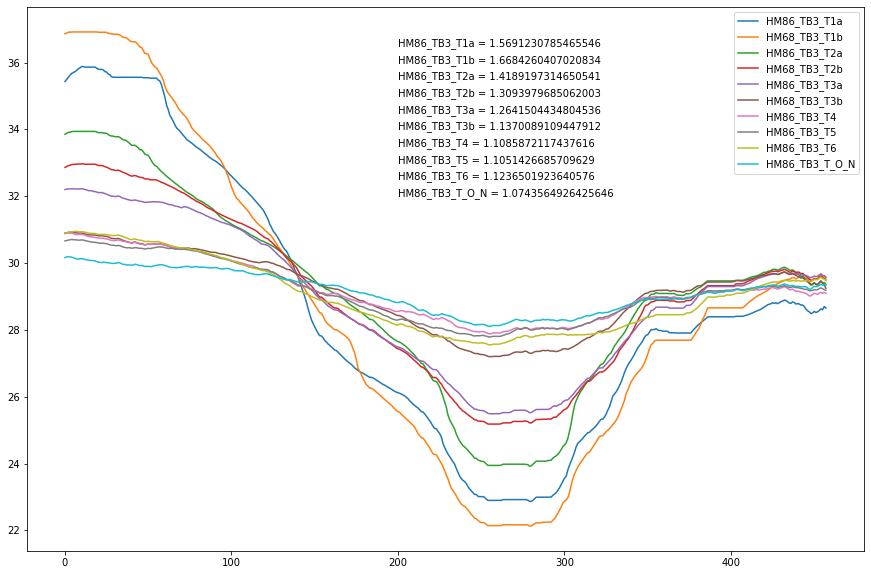

In [31]:
HM86_TB3_T1a = pd.read_csv('TB3/HM86_TB3-T1a/HM86_TB3-T1a.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T1a'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T1b = pd.read_csv('TB3/HM86_TB3-T1b/HM86_TB3-T1b.bed_perc_bins.csv', names=['bin', 'HM68_TB3_T1b'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T1 = pd.merge(HM86_TB3_T1a, HM86_TB3_T1b, on=["bin", "bin"])
HM86_TB3_T1_mean = HM86_TB3_T1[['HM86_TB3_T1a', 'HM68_TB3_T1b']].mean(axis=1)

HM86_TB3_T2a = pd.read_csv('TB3/HM86_TB3-T2a/HM86_TB3-T2a.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T2a'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T2b = pd.read_csv('TB3/HM86_TB3-T2b/HM86_TB3-T2b.bed_perc_bins.csv', names=['bin', 'HM68_TB3_T2b'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T2 = pd.merge(HM86_TB3_T2a, HM86_TB3_T2b, on=["bin", "bin"])
HM86_TB3_T2_mean = HM86_TB3_T2[['HM86_TB3_T2a', 'HM68_TB3_T2b']].mean(axis=1)

HM86_TB3_T3a = pd.read_csv('TB3/HM86_TB3-T3a/HM86_TB3-T3a.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T3a'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T3b = pd.read_csv('TB3/HM86_TB3-T3b/HM86_TB3-T3b.bed_perc_bins.csv', names=['bin', 'HM68_TB3_T3b'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T3 = pd.merge(HM86_TB3_T3a, HM86_TB3_T3b, on=["bin", "bin"])
HM86_TB3_T3_mean = HM86_TB3_T3[['HM86_TB3_T3a', 'HM68_TB3_T3b']].mean(axis=1)

HM86_TB3_T4 = pd.read_csv('TB3/HM86_TB3-T4/HM86_TB3-T4.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T4'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T5 = pd.read_csv('TB3/HM86_TB3-T5/HM86_TB3-T5.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T5'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T6 = pd.read_csv('TB3/HM86_TB3-T6/HM86_TB3-T6.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T6'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T_O_N = pd.read_csv('TB3/HM86_TB3-T_O-N/HM86_TB3-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T_O_N'], header=None, dtype=float, skiprows=[0])

HM86_TB3_temp1 = pd.merge(HM86_TB3_T1a, HM86_TB3_T1b, on=["bin", "bin"])
HM86_TB3_temp2 = pd.merge(HM86_TB3_temp1, HM86_TB3_T2a, on=["bin", "bin"])
HM86_TB3_temp3 = pd.merge(HM86_TB3_temp2, HM86_TB3_T2b, on=["bin", "bin"])
HM86_TB3_temp4 = pd.merge(HM86_TB3_temp3, HM86_TB3_T3a, on=["bin", "bin"])
HM86_TB3_temp5 = pd.merge(HM86_TB3_temp4, HM86_TB3_T3b, on=["bin", "bin"])
HM86_TB3_temp6 = pd.merge(HM86_TB3_temp5, HM86_TB3_T4, on=["bin", "bin"])
HM86_TB3_temp7 = pd.merge(HM86_TB3_temp6, HM86_TB3_T5, on=["bin", "bin"])
HM86_TB3_temp8 = pd.merge(HM86_TB3_temp7, HM86_TB3_T6, on=["bin", "bin"])
HM86_TB3 = pd.merge(HM86_TB3_temp8, HM86_TB3_T_O_N, on=["bin", "bin"])
HM86_TB3 = HM86_TB3.drop(['bin'], axis=1)

!grep 'median_sliding_window_array' TB3/HM86*/*bins_PTR.txt

fig, ax = plt.subplots(1, 1)
HM86_TB3.plot(legend=True, ax=ax)
ax.text(200, 36.5, 'HM86_TB3_T1a = 1.5691230785465546', fontsize = 10)
ax.text(200, 36, 'HM86_TB3_T1b = 1.6684260407020834', fontsize = 10)
ax.text(200, 35.5, 'HM86_TB3_T2a = 1.4189197314650541', fontsize = 10)
ax.text(200, 35, 'HM86_TB3_T2b = 1.3093979685062003', fontsize = 10)
ax.text(200, 34.5, 'HM86_TB3_T3a = 1.2641504434804536', fontsize = 10)
ax.text(200, 34, 'HM86_TB3_T3b = 1.1370089109447912', fontsize = 10)
ax.text(200, 33.5, 'HM86_TB3_T4 = 1.1085872117437616', fontsize = 10)
ax.text(200, 33, 'HM86_TB3_T5 = 1.1051426685709629', fontsize = 10)
ax.text(200, 32.5, 'HM86_TB3_T6 = 1.1236501923640576', fontsize = 10)
ax.text(200, 32, 'HM86_TB3_T_O_N = 1.0743564926425646', fontsize = 10)

#### LB Broth - First

In [121]:
HM86_LB1_T1a = pd.read_csv('LB1/HM86_LB1-T1a/HM86_LB1-T1a.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T1a'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T1b = pd.read_csv('LB1/HM86_LB1-T1b/HM86_LB1-T1b.bed_perc_bins.csv', names=['bin', 'HM68_LB1_T1b'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T1 = pd.merge(HM86_LB1_T1a, HM86_LB1_T1b, on=["bin", "bin"])
HM86_LB1_T1_mean = HM86_LB1_T1[['HM86_LB1_T1a', 'HM68_LB1_T1b']].mean(axis=1)

HM86_LB1_T2a = pd.read_csv('LB1/HM86_LB1-T2a/HM86_LB1-T2a.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T2a'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T2b = pd.read_csv('LB1/HM86_LB1-T2b/HM86_LB1-T2b.bed_perc_bins.csv', names=['bin', 'HM68_LB1_T2b'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T2 = pd.merge(HM86_LB1_T2a, HM86_LB1_T2b, on=["bin", "bin"])
HM86_LB1_T2_mean = HM86_LB1_T2[['HM86_LB1_T2a', 'HM68_LB1_T2b']].mean(axis=1)

HM86_LB1_T3a = pd.read_csv('LB1/HM86_LB1-T3a/HM86_LB1-T3a.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T3a'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T3b = pd.read_csv('LB1/HM86_LB1-T3b/HM86_LB1-T3b.bed_perc_bins.csv', names=['bin', 'HM68_LB1_T3b'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T3 = pd.merge(HM86_LB1_T3a, HM86_LB1_T3b, on=["bin", "bin"])
HM86_LB1_T3_mean = HM86_LB1_T3[['HM86_LB1_T3a', 'HM68_LB1_T3b']].mean(axis=1)

HM86_LB1_T4 = pd.read_csv('LB1/HM86_LB1-T4/HM86_LB1-T4.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T4'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T5 = pd.read_csv('LB1/HM86_LB1-T5/HM86_LB1-T5.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T5'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T6 = pd.read_csv('LB1/HM86_LB1-T6/HM86_LB1-T6.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T6'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T_O_N = pd.read_csv('LB1/HM86_LB1-T_O-N/HM86_LB1-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T_O_N'], header=None, dtype=float, skiprows=[0])

In [122]:
!grep 'median_sliding_window_array' LB1/*/*bins_PTR.txt

LB1/HM86_LB1-T1a/HM86_LB1-T1a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB1/HM86_LB1-T1a/HM86_LB1-T1a_bins.csv median_sliding_window_array :	1.5590214999891083
LB1/HM86_LB1-T1b/HM86_LB1-T1b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB1/HM86_LB1-T1b/HM86_LB1-T1b_bins.csv median_sliding_window_array :	1.8342112677869329
LB1/HM86_LB1-T2a/HM86_LB1-T2a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB1/HM86_LB1-T2a/HM86_LB1-T2a_bins.csv median_sliding_window_array :	1.4979999740256367
LB1/HM86_LB1-T2b/HM86_LB1-T2b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB1/HM86_LB1-T2b/HM86_LB1-T2b_bins.csv median_sliding_window_array :	1.4573874733160739
LB1/HM86_LB1-T3a/HM86_LB1-T3a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB1/HM86_LB1-T3a/HM86_LB1-T3a_bins.csv median_sliding_window_array :	1.4045445180920988
LB1/HM86_LB1-T3b/HM86_LB1-T3b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB1/HM86_LB1-T3b/HM86_LB1-T3b_bins.csv

In [22]:
HM86_TB1_temp1 = pd.merge(HM86_TB1_T1a, HM86_TB1_T1b, on=["bin", "bin"])
HM86_TB1_temp2 = pd.merge(HM86_TB1_temp1, HM86_TB1_T2a, on=["bin", "bin"])
HM86_TB1_temp3 = pd.merge(HM86_TB1_temp2, HM86_TB1_T2b, on=["bin", "bin"])
HM86_TB1_temp4 = pd.merge(HM86_TB1_temp3, HM86_TB1_T3a, on=["bin", "bin"])
HM86_TB1_temp5 = pd.merge(HM86_TB1_temp4, HM86_TB1_T3b, on=["bin", "bin"])
HM86_TB1_temp6 = pd.merge(HM86_TB1_temp5, HM86_TB1_T4, on=["bin", "bin"])
HM86_TB1_temp7 = pd.merge(HM86_TB1_temp6, HM86_TB1_T5, on=["bin", "bin"])
HM86_TB1_temp8 = pd.merge(HM86_TB1_temp7, HM86_TB1_T6, on=["bin", "bin"])
HM86_TB1 = pd.merge(HM86_TB1_temp8, HM86_TB1_T_O_N, on=["bin", "bin"])
HM86_TB1 = HM86_TB1.drop(['bin'], axis=1)

Text(200, 33, 'HM86_LB1_T_O_N = 1.0535753978267353')

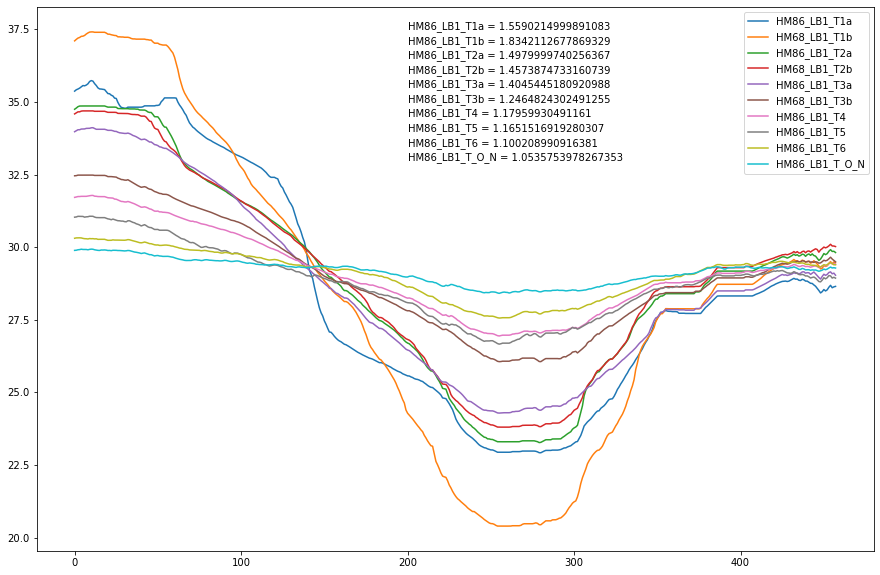

In [141]:
fig, ax = plt.subplots(1, 1)
HM86_LB1.plot(legend=True, ax=ax)
ax.text(200, 37.5, 'HM86_LB1_T1a = 1.5590214999891083', fontsize = 10)
ax.text(200, 37, 'HM86_LB1_T1b = 1.8342112677869329', fontsize = 10)
ax.text(200, 36.5, 'HM86_LB1_T2a = 1.4979999740256367', fontsize = 10)
ax.text(200, 36, 'HM86_LB1_T2b = 1.4573874733160739', fontsize = 10)
ax.text(200, 35.5, 'HM86_LB1_T3a = 1.4045445180920988', fontsize = 10)
ax.text(200, 35, 'HM86_LB1_T3b = 1.2464824302491255', fontsize = 10)
ax.text(200, 34.5, 'HM86_LB1_T4 = 1.17959930491161', fontsize = 10)
ax.text(200, 34, 'HM86_LB1_T5 = 1.1651516919280307', fontsize = 10)
ax.text(200, 33.5, 'HM86_LB1_T6 = 1.100208990916381', fontsize = 10)
ax.text(200, 33, 'HM86_LB1_T_O_N = 1.0535753978267353', fontsize = 10)

#### LB Broth - Second

In [2]:
HM86_LB2_T1a = pd.read_csv('LB2/HM86_LB2-T1a/HM86_LB2-T1a.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T1a'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T1b = pd.read_csv('LB2/HM86_LB2-T1b/HM86_LB2-T1b.bed_perc_bins.csv', names=['bin', 'HM68_LB2_T1b'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T1 = pd.merge(HM86_LB2_T1a, HM86_LB2_T1b, on=["bin", "bin"])
HM86_LB2_T1_mean = HM86_LB2_T1[['HM86_LB2_T1a', 'HM68_LB2_T1b']].mean(axis=1)

HM86_LB2_T2a = pd.read_csv('LB2/HM86_LB2-T2a/HM86_LB2-T2a.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T2a'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T2b = pd.read_csv('LB2/HM86_LB2-T2b/HM86_LB2-T2b.bed_perc_bins.csv', names=['bin', 'HM68_LB2_T2b'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T2 = pd.merge(HM86_LB2_T2a, HM86_LB2_T2b, on=["bin", "bin"])
HM86_LB2_T2_mean = HM86_LB2_T2[['HM86_LB2_T2a', 'HM68_LB2_T2b']].mean(axis=1)

HM86_LB2_T3a = pd.read_csv('LB2/HM86_LB2-T3a/HM86_LB2-T3a.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T3a'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T3b = pd.read_csv('LB2/HM86_LB2-T3b/HM86_LB2-T3b.bed_perc_bins.csv', names=['bin', 'HM68_LB2_T3b'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T3 = pd.merge(HM86_LB2_T3a, HM86_LB2_T3b, on=["bin", "bin"])
HM86_LB2_T3_mean = HM86_LB2_T3[['HM86_LB2_T3a', 'HM68_LB2_T3b']].mean(axis=1)

HM86_LB2_T4 = pd.read_csv('LB2/HM86_LB2-T4/HM86_LB2-T4.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T4'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T5 = pd.read_csv('LB2/HM86_LB2-T5/HM86_LB2-T5.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T5'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T6 = pd.read_csv('LB2/HM86_LB2-T6/HM86_LB2-T6.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T6'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T_O_N = pd.read_csv('LB2/HM86_LB2-T_O-N/HM86_LB2-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T_O_N'], header=None, dtype=float, skiprows=[0])

In [3]:
!grep 'median_sliding_window_array' LB2/*/*bins_PTR.txt

LB2/HM86_LB2-T1a/HM86_LB2-T1a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB2/HM86_LB2-T1a/HM86_LB2-T1a_bins.csv median_sliding_window_array :	1.847940966858916
LB2/HM86_LB2-T1b/HM86_LB2-T1b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB2/HM86_LB2-T1b/HM86_LB2-T1b_bins.csv median_sliding_window_array :	1.6228015872374473
LB2/HM86_LB2-T2a/HM86_LB2-T2a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB2/HM86_LB2-T2a/HM86_LB2-T2a_bins.csv median_sliding_window_array :	1.5707796697586232
LB2/HM86_LB2-T2b/HM86_LB2-T2b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB2/HM86_LB2-T2b/HM86_LB2-T2b_bins.csv median_sliding_window_array :	1.537795636153551
LB2/HM86_LB2-T3a/HM86_LB2-T3a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB2/HM86_LB2-T3a/HM86_LB2-T3a_bins.csv median_sliding_window_array :	1.5044730649760008
LB2/HM86_LB2-T3b/HM86_LB2-T3b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB2/HM86_LB2-T3b/HM86_LB2-T3b_bins.csv m

In [4]:
HM86_LB2_temp1 = pd.merge(HM86_LB2_T1a, HM86_LB2_T1b, on=["bin", "bin"])
HM86_LB2_temp2 = pd.merge(HM86_LB2_temp1, HM86_LB2_T2a, on=["bin", "bin"])
HM86_LB2_temp3 = pd.merge(HM86_LB2_temp2, HM86_LB2_T2b, on=["bin", "bin"])
HM86_LB2_temp4 = pd.merge(HM86_LB2_temp3, HM86_LB2_T3a, on=["bin", "bin"])
HM86_LB2_temp5 = pd.merge(HM86_LB2_temp4, HM86_LB2_T3b, on=["bin", "bin"])
HM86_LB2_temp6 = pd.merge(HM86_LB2_temp5, HM86_LB2_T4, on=["bin", "bin"])
HM86_LB2_temp7 = pd.merge(HM86_LB2_temp6, HM86_LB2_T5, on=["bin", "bin"])
HM86_LB2_temp8 = pd.merge(HM86_LB2_temp7, HM86_LB2_T6, on=["bin", "bin"])
HM86_LB2 = pd.merge(HM86_LB2_temp8, HM86_LB2_T_O_N, on=["bin", "bin"])
HM86_LB2 = HM86_LB2.drop(['bin'], axis=1)

Text(200, 33, 'HM86_LB2_T_O_N = 1.0462056008886902')

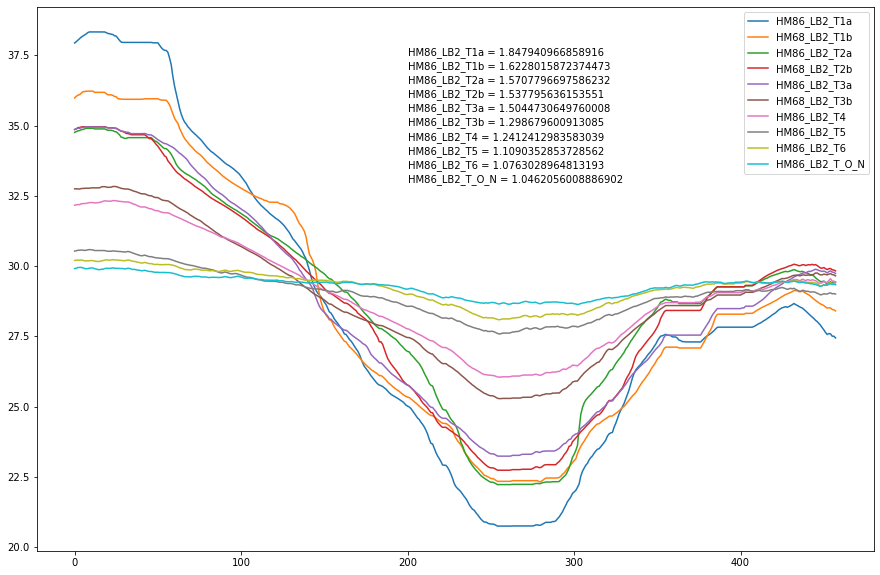

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(1, 1)
HM86_LB2.plot(legend=True, ax=ax)
ax.text(200, 37.5, 'HM86_LB2_T1a = 1.847940966858916', fontsize = 10)
ax.text(200, 37, 'HM86_LB2_T1b = 1.6228015872374473', fontsize = 10)
ax.text(200, 36.5, 'HM86_LB2_T2a = 1.5707796697586232', fontsize = 10)
ax.text(200, 36, 'HM86_LB2_T2b = 1.537795636153551', fontsize = 10)
ax.text(200, 35.5, 'HM86_LB2_T3a = 1.5044730649760008', fontsize = 10)
ax.text(200, 35, 'HM86_LB2_T3b = 1.298679600913085', fontsize = 10)
ax.text(200, 34.5, 'HM86_LB2_T4 = 1.2412412983583039', fontsize = 10)
ax.text(200, 34, 'HM86_LB2_T5 = 1.1090352853728562', fontsize = 10)
ax.text(200, 33.5, 'HM86_LB2_T6 = 1.0763028964813193', fontsize = 10)
ax.text(200, 33, 'HM86_LB2_T_O_N = 1.0462056008886902', fontsize = 10)

#### LB Broth - Third

In [9]:
HM86_LB3_T1a = pd.read_csv('LB3/HM86_LB3-T1a/HM86_LB3-T1a.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T1a'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T1b = pd.read_csv('LB3/HM86_LB3-T1b/HM86_LB3-T1b.bed_perc_bins.csv', names=['bin', 'HM68_LB3_T1b'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T1 = pd.merge(HM86_LB3_T1a, HM86_LB3_T1b, on=["bin", "bin"])
HM86_LB3_T1_mean = HM86_LB3_T1[['HM86_LB3_T1a', 'HM68_LB3_T1b']].mean(axis=1)

HM86_LB3_T2a = pd.read_csv('LB3/HM86_LB3-T2a/HM86_LB3-T2a.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T2a'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T2b = pd.read_csv('LB3/HM86_LB3-T2b/HM86_LB3-T2b.bed_perc_bins.csv', names=['bin', 'HM68_LB3_T2b'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T2 = pd.merge(HM86_LB3_T2a, HM86_LB3_T2b, on=["bin", "bin"])
HM86_LB3_T2_mean = HM86_LB3_T2[['HM86_LB3_T2a', 'HM68_LB3_T2b']].mean(axis=1)

HM86_LB3_T3a = pd.read_csv('LB3/HM86_LB3-T3a/HM86_LB3-T3a.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T3a'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T3b = pd.read_csv('LB3/HM86_LB3-T3b/HM86_LB3-T3b.bed_perc_bins.csv', names=['bin', 'HM68_LB3_T3b'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T3 = pd.merge(HM86_LB3_T3a, HM86_LB3_T3b, on=["bin", "bin"])
HM86_LB3_T3_mean = HM86_LB3_T3[['HM86_LB3_T3a', 'HM68_LB3_T3b']].mean(axis=1)

HM86_LB3_T4 = pd.read_csv('LB3/HM86_LB3-T4/HM86_LB3-T4.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T4'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T5 = pd.read_csv('LB3/HM86_LB3-T5/HM86_LB3-T5.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T5'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T6 = pd.read_csv('LB3/HM86_LB3-T6/HM86_LB3-T6.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T6'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T_O_N = pd.read_csv('LB3/HM86_LB3-T_O-N/HM86_LB3-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T_O_N'], header=None, dtype=float, skiprows=[0])

In [10]:
!grep 'median_sliding_window_array' LB3/*/*bins_PTR.txt

LB3/HM86_LB3-T1a/HM86_LB3-T1a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB3/HM86_LB3-T1a/HM86_LB3-T1a_bins.csv median_sliding_window_array :	1.4688356817148807
LB3/HM86_LB3-T1b/HM86_LB3-T1b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB3/HM86_LB3-T1b/HM86_LB3-T1b_bins.csv median_sliding_window_array :	1.5819465237946353
LB3/HM86_LB3-T2a/HM86_LB3-T2a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB3/HM86_LB3-T2a/HM86_LB3-T2a_bins.csv median_sliding_window_array :	1.4316499652394963
LB3/HM86_LB3-T2b/HM86_LB3-T2b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB3/HM86_LB3-T2b/HM86_LB3-T2b_bins.csv median_sliding_window_array :	1.3814762870582142
LB3/HM86_LB3-T3a/HM86_LB3-T3a_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB3/HM86_LB3-T3a/HM86_LB3-T3a_bins.csv median_sliding_window_array :	1.319381433070217
LB3/HM86_LB3-T3b/HM86_LB3-T3b_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/LB3/HM86_LB3-T3b/HM86_LB3-T3b_bins.csv 

In [11]:
HM86_LB3_temp1 = pd.merge(HM86_LB3_T1a, HM86_LB3_T1b, on=["bin", "bin"])
HM86_LB3_temp2 = pd.merge(HM86_LB3_temp1, HM86_LB3_T2a, on=["bin", "bin"])
HM86_LB3_temp3 = pd.merge(HM86_LB3_temp2, HM86_LB3_T2b, on=["bin", "bin"])
HM86_LB3_temp4 = pd.merge(HM86_LB3_temp3, HM86_LB3_T3a, on=["bin", "bin"])
HM86_LB3_temp5 = pd.merge(HM86_LB3_temp4, HM86_LB3_T3b, on=["bin", "bin"])
HM86_LB3_temp6 = pd.merge(HM86_LB3_temp5, HM86_LB3_T4, on=["bin", "bin"])
HM86_LB3_temp7 = pd.merge(HM86_LB3_temp6, HM86_LB3_T5, on=["bin", "bin"])
HM86_LB3_temp8 = pd.merge(HM86_LB3_temp7, HM86_LB3_T6, on=["bin", "bin"])
HM86_LB3 = pd.merge(HM86_LB3_temp8, HM86_LB3_T_O_N, on=["bin", "bin"])
HM86_LB3 = HM86_LB3.drop(['bin'], axis=1)

Text(200, 31.5, 'HM86_LB3_T_O_N = 1.0518703385726764')

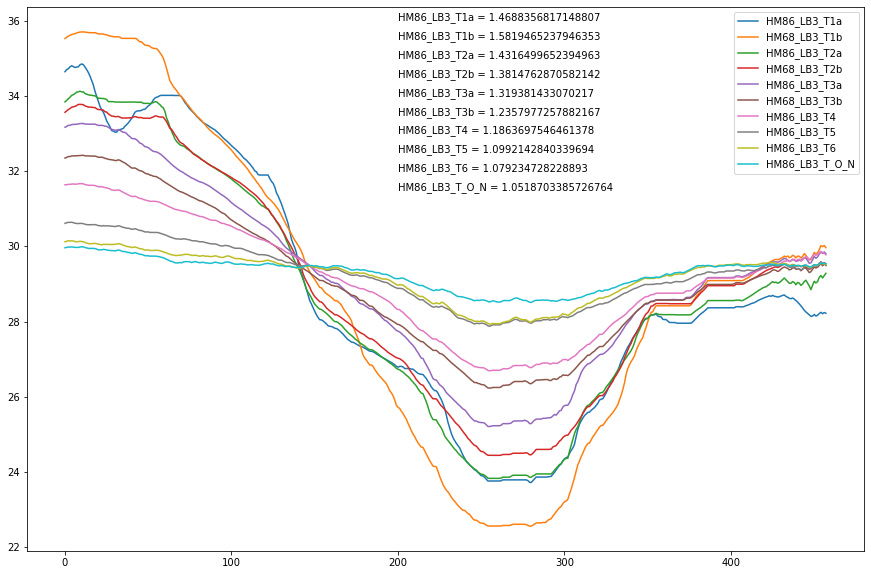

In [13]:
fig, ax = plt.subplots(1, 1)
HM86_LB3.plot(legend=True, ax=ax)
ax.text(200, 36, 'HM86_LB3_T1a = 1.4688356817148807', fontsize = 10)
ax.text(200, 35.5, 'HM86_LB3_T1b = 1.5819465237946353', fontsize = 10)
ax.text(200, 35, 'HM86_LB3_T2a = 1.4316499652394963', fontsize = 10)
ax.text(200, 34.5, 'HM86_LB3_T2b = 1.3814762870582142', fontsize = 10)
ax.text(200, 34, 'HM86_LB3_T3a = 1.319381433070217', fontsize = 10)
ax.text(200, 33.5, 'HM86_LB3_T3b = 1.2357977257882167', fontsize = 10)
ax.text(200, 33, 'HM86_LB3_T4 = 1.1863697546461378', fontsize = 10)
ax.text(200, 32.5, 'HM86_LB3_T5 = 1.0992142840339694', fontsize = 10)
ax.text(200, 32, 'HM86_LB3_T6 = 1.079234728228893', fontsize = 10)
ax.text(200, 31.5, 'HM86_LB3_T_O_N = 1.0518703385726764', fontsize = 10)

#### M9 Glucose

In [14]:
HM86_M9Glu1_2_5h = pd.read_csv('M9Glu1/HM86_M9Glu1-2.5h/HM86_M9Glu1-2.5h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_2_5h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_3_5h = pd.read_csv('M9Glu1/HM86_M9Glu1-3.5h/HM86_M9Glu1-3.5h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_3_5h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_4h = pd.read_csv('M9Glu1/HM86_M9Glu1-4h/HM86_M9Glu1-4h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_4h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_5h = pd.read_csv('M9Glu1/HM86_M9Glu1-5h/HM86_M9Glu1-5h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_5h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_6h = pd.read_csv('M9Glu1/HM86_M9Glu1-6h/HM86_M9Glu1-6h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_6h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_7h = pd.read_csv('M9Glu1/HM86_M9Glu1-7h/HM86_M9Glu1-7h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_7h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_8h = pd.read_csv('M9Glu1/HM86_M9Glu1-8h/HM86_M9Glu1-8h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_8h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_O_N = pd.read_csv('M9Glu1/HM86_M9Glu1-_O-N/HM86_M9Glu1-_O-N.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_O_N'], header=None, dtype=float, skiprows=[0])

In [15]:
!grep 'median_sliding_window_array' M9Glu1/*/*bins_PTR.txt

M9Glu1/HM86_M9Glu1-2.5h/HM86_M9Glu1-2.5h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/M9Glu1/HM86_M9Glu1-2.5h/HM86_M9Glu1-2.5h_bins.csv median_sliding_window_array :	1.1439331653047418
M9Glu1/HM86_M9Glu1-3.5h/HM86_M9Glu1-3.5h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/M9Glu1/HM86_M9Glu1-3.5h/HM86_M9Glu1-3.5h_bins.csv median_sliding_window_array :	1.2005649679873682
M9Glu1/HM86_M9Glu1-4h/HM86_M9Glu1-4h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/M9Glu1/HM86_M9Glu1-4h/HM86_M9Glu1-4h_bins.csv median_sliding_window_array :	1.173085159361079
M9Glu1/HM86_M9Glu1-5h/HM86_M9Glu1-5h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/M9Glu1/HM86_M9Glu1-5h/HM86_M9Glu1-5h_bins.csv median_sliding_window_array :	1.244596013488885
M9Glu1/HM86_M9Glu1-6h/HM86_M9Glu1-6h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/M9Glu1/HM86_M9Glu1-6h/HM86_M9Glu1-6h_bins.csv median_sliding_window_array :	1.2806111605109631
M9Glu1/HM86_M9Glu1-7h/HM86_M9Glu1-7h_bins

In [16]:
HM86_M9Glu1_temp1 = pd.merge(HM86_M9Glu1_2_5h, HM86_M9Glu1_3_5h, on=["bin", "bin"])
HM86_M9Glu1_temp2 = pd.merge(HM86_M9Glu1_temp1, HM86_M9Glu1_4h, on=["bin", "bin"])
HM86_M9Glu1_temp3 = pd.merge(HM86_M9Glu1_temp2, HM86_M9Glu1_5h, on=["bin", "bin"])
HM86_M9Glu1_temp4 = pd.merge(HM86_M9Glu1_temp3, HM86_M9Glu1_6h, on=["bin", "bin"])
HM86_M9Glu1_temp5 = pd.merge(HM86_M9Glu1_temp4, HM86_M9Glu1_7h, on=["bin", "bin"])
HM86_M9Glu1_temp6 = pd.merge(HM86_M9Glu1_temp5, HM86_M9Glu1_8h, on=["bin", "bin"])
HM86_M9Glu1_temp7 = pd.merge(HM86_M9Glu1_temp6, HM86_M9Glu1_O_N, on=["bin", "bin"])
HM86_M9Glu1 = pd.merge(HM86_M9Glu1_temp7, HM86_M9Glu1_O_N, on=["bin", "bin"])
HM86_M9Glu1 = HM86_M9Glu1.drop(['bin'], axis=1)

Text(200, 29.5, 'HM86_M9Glu1_O_N = 1.1229532817394459')

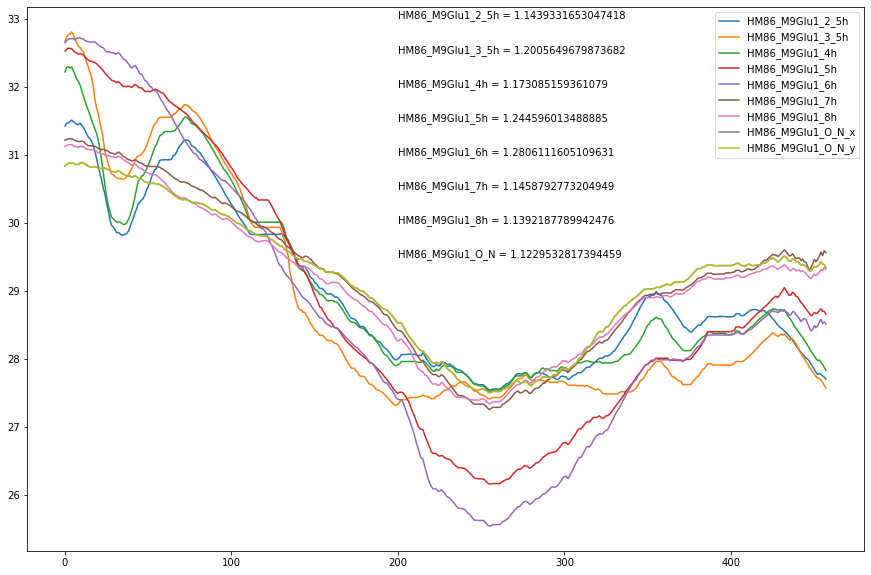

In [17]:
fig, ax = plt.subplots(1, 1)
HM86_M9Glu1.plot(legend=True, ax=ax)
ax.text(200, 33, 'HM86_M9Glu1_2_5h = 1.1439331653047418', fontsize = 10)
ax.text(200, 32.5, 'HM86_M9Glu1_3_5h = 1.2005649679873682', fontsize = 10)
ax.text(200, 32, 'HM86_M9Glu1_4h = 1.173085159361079', fontsize = 10)
ax.text(200, 31.5, 'HM86_M9Glu1_5h = 1.244596013488885', fontsize = 10)
ax.text(200, 31, 'HM86_M9Glu1_6h = 1.2806111605109631', fontsize = 10)
ax.text(200, 30.5, 'HM86_M9Glu1_7h = 1.1458792773204949', fontsize = 10)
ax.text(200, 30, 'HM86_M9Glu1_8h = 1.1392187789942476', fontsize = 10)
ax.text(200, 29.5, 'HM86_M9Glu1_O_N = 1.1229532817394459', fontsize = 10)

#### Stab - Terrific Broth

Stab-TB/Stab_HM86_TB2h/Stab_HM86_TB2h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/Stab-TB/Stab_HM86_TB2h/Stab_HM86_TB2h_bins.csv median_sliding_window_array :	1.4628794214907934
Stab-TB/Stab_HM86_TB3h/Stab_HM86_TB3h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/Stab-TB/Stab_HM86_TB3h/Stab_HM86_TB3h_bins.csv median_sliding_window_array :	1.4751496760436316
Stab-TB/Stab_HM86_TB4h/Stab_HM86_TB4h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/Stab-TB/Stab_HM86_TB4h/Stab_HM86_TB4h_bins.csv median_sliding_window_array :	1.4645609268333957
Stab-TB/Stab_HM86_TB5h/Stab_HM86_TB5h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/Stab-TB/Stab_HM86_TB5h/Stab_HM86_TB5h_bins.csv median_sliding_window_array :	1.4736982063374622
Stab-TB/Stab_HM86_TB6h/Stab_HM86_TB6h_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/Stab-TB/Stab_HM86_TB6h/Stab_HM86_TB6h_bins.csv median_sliding_window_array :	1.4805843948705952
Stab-TB/Stab_HM86_Tb_O-N/Stab_HM86_Tb_O-N_bin

Text(200, 30.5, 'Stab_HM86_Tb_O_N = 1.1194170841016162')

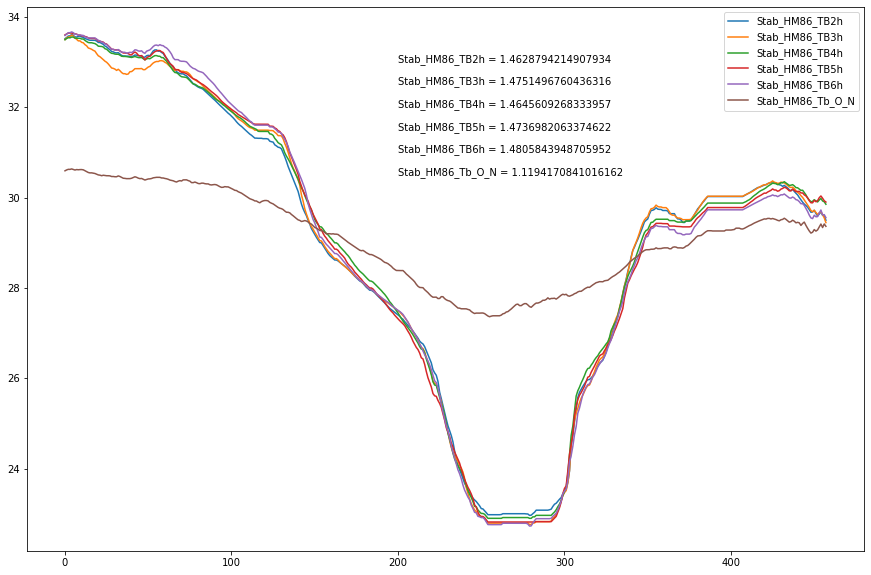

In [37]:
Stab_HM86_TB2h = pd.read_csv('Stab-TB/Stab_HM86_TB2h/Stab_HM86_TB2h.bed_perc_bins.csv', names=['bin', 'Stab_HM86_TB2h'], header=None, dtype=float, skiprows=[0])
Stab_HM86_TB3h = pd.read_csv('Stab-TB/Stab_HM86_TB3h/Stab_HM86_TB3h.bed_perc_bins.csv', names=['bin', 'Stab_HM86_TB3h'], header=None, dtype=float, skiprows=[0])
Stab_HM86_TB4h = pd.read_csv('Stab-TB/Stab_HM86_TB4h/Stab_HM86_TB4h.bed_perc_bins.csv', names=['bin', 'Stab_HM86_TB4h'], header=None, dtype=float, skiprows=[0])
Stab_HM86_TB5h = pd.read_csv('Stab-TB/Stab_HM86_TB5h/Stab_HM86_TB5h.bed_perc_bins.csv', names=['bin', 'Stab_HM86_TB5h'], header=None, dtype=float, skiprows=[0])
Stab_HM86_TB6h = pd.read_csv('Stab-TB/Stab_HM86_TB6h/Stab_HM86_TB6h.bed_perc_bins.csv', names=['bin', 'Stab_HM86_TB6h'], header=None, dtype=float, skiprows=[0])
Stab_HM86_Tb_O_N = pd.read_csv('Stab-TB/Stab_HM86_Tb_O-N/Stab_HM86_Tb_O-N.bed_perc_bins.csv', names=['bin', 'Stab_HM86_Tb_O_N'], header=None, dtype=float, skiprows=[0])

!grep 'median_sliding_window_array' Stab-TB/*/*bins_PTR.txt

Stab_HM86_temp1 = pd.merge(Stab_HM86_TB2h, Stab_HM86_TB3h, on=["bin", "bin"])
Stab_HM86_temp2 = pd.merge(Stab_HM86_temp1, Stab_HM86_TB4h, on=["bin", "bin"])
Stab_HM86_temp3 = pd.merge(Stab_HM86_temp2, Stab_HM86_TB5h, on=["bin", "bin"])
Stab_HM86_temp4 = pd.merge(Stab_HM86_temp3, Stab_HM86_TB6h, on=["bin", "bin"])
Stab_HM86 = pd.merge(Stab_HM86_temp4, Stab_HM86_Tb_O_N, on=["bin", "bin"])

Stab_HM86 = Stab_HM86.drop(['bin'], axis=1)

fig, ax = plt.subplots(1, 1)
Stab_HM86.plot(legend=True, ax=ax)
ax.text(200, 33, 'Stab_HM86_TB2h = 1.4628794214907934', fontsize = 10)
ax.text(200, 32.5, 'Stab_HM86_TB3h = 1.4751496760436316', fontsize = 10)
ax.text(200, 32, 'Stab_HM86_TB4h = 1.4645609268333957', fontsize = 10)
ax.text(200, 31.5, 'Stab_HM86_TB5h = 1.4736982063374622', fontsize = 10)
ax.text(200, 31, 'Stab_HM86_TB6h = 1.4805843948705952', fontsize = 10)
ax.text(200, 30.5, 'Stab_HM86_Tb_O_N = 1.1194170841016162', fontsize = 10)


#### Stab - Human Urine

Stab-HU/Stab_HU-HM86_2h_R1/Stab_HU-HM86_2h_R1_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/Stab-HU/Stab_HU-HM86_2h_R1/Stab_HU-HM86_2h_R1_bins.csv median_sliding_window_array :	1.1590592241030906
Stab-HU/Stab_HU-HM86_2h_R2/Stab_HU-HM86_2h_R2_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/Stab-HU/Stab_HU-HM86_2h_R2/Stab_HU-HM86_2h_R2_bins.csv median_sliding_window_array :	1.1939597492886866
Stab-HU/Stab_HU-HM86_3h_R1/Stab_HU-HM86_3h_R1_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/Stab-HU/Stab_HU-HM86_3h_R1/Stab_HU-HM86_3h_R1_bins.csv median_sliding_window_array :	1.2504481949464783
Stab-HU/Stab_HU-HM86_3h_R2/Stab_HU-HM86_3h_R2_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/Stab-HU/Stab_HU-HM86_3h_R2/Stab_HU-HM86_3h_R2_bins.csv median_sliding_window_array :	1.1905350412312885
Stab-HU/Stab_HU-HM86_4h_R1/Stab_HU-HM86_4h_R1_bins_PTR.txt:results/2023-06-23_Growth_Rate_Analysis/ptr/Stab-HU/Stab_HU-HM86_4h_R1/Stab_HU-HM86_4h_R1_bins.csv median_sliding

Text(200, 27.75, 'Stab_HU-HM86_6h_R2 = 1.2211971870285678')

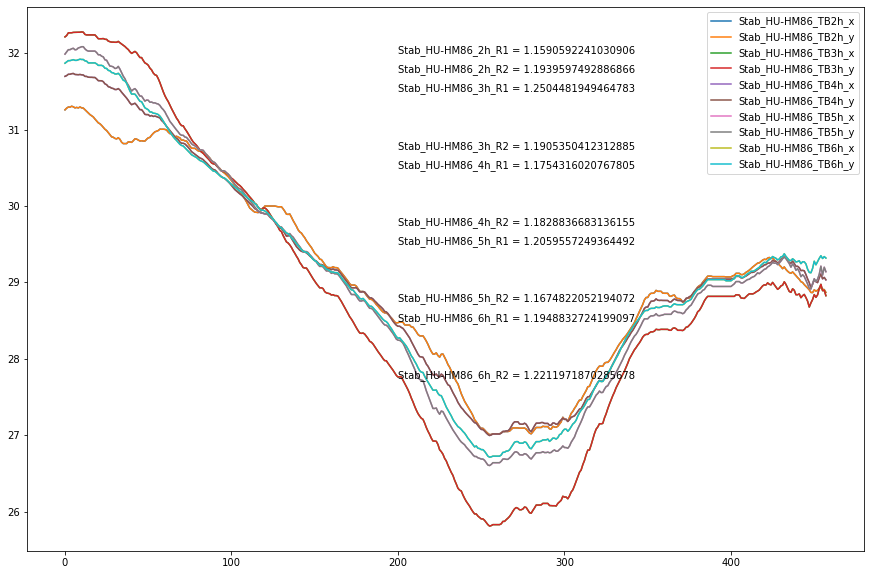

In [70]:
Stab_HU_HM86_TB2h_R1 = pd.read_csv('Stab-HU/Stab_HU-HM86_2h_R1/Stab_HU-HM86_2h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB2h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB2h_R2 = pd.read_csv('Stab-HU/Stab_HU-HM86_2h_R1/Stab_HU-HM86_2h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB2h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB3h_R1 = pd.read_csv('Stab-HU/Stab_HU-HM86_3h_R1/Stab_HU-HM86_3h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB3h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB3h_R2 = pd.read_csv('Stab-HU/Stab_HU-HM86_3h_R1/Stab_HU-HM86_3h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB3h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB4h_R1 = pd.read_csv('Stab-HU/Stab_HU-HM86_4h_R1/Stab_HU-HM86_4h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB4h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB4h_R2 = pd.read_csv('Stab-HU/Stab_HU-HM86_4h_R1/Stab_HU-HM86_4h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB4h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB5h_R1 = pd.read_csv('Stab-HU/Stab_HU-HM86_5h_R1/Stab_HU-HM86_5h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB5h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB5h_R2 = pd.read_csv('Stab-HU/Stab_HU-HM86_5h_R1/Stab_HU-HM86_5h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB5h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB6h_R1 = pd.read_csv('Stab-HU/Stab_HU-HM86_6h_R1/Stab_HU-HM86_6h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB6h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB6h_R2 = pd.read_csv('Stab-HU/Stab_HU-HM86_6h_R1/Stab_HU-HM86_6h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB6h'], header=None, dtype=float, skiprows=[0])

!grep 'median_sliding_window_array' Stab-HU/*/*bins_PTR.txt

Stab_HU_HM86_temp1 = pd.merge(Stab_HU_HM86_TB2h_R1, Stab_HU_HM86_TB2h_R2, on=["bin", "bin"])
Stab_HU_HM86_temp2 = pd.merge(Stab_HU_HM86_temp1, Stab_HU_HM86_TB3h_R1, on=["bin", "bin"])
Stab_HU_HM86_temp3 = pd.merge(Stab_HU_HM86_temp2, Stab_HU_HM86_TB3h_R2, on=["bin", "bin"])
Stab_HU_HM86_temp4 = pd.merge(Stab_HU_HM86_temp3, Stab_HU_HM86_TB4h_R1, on=["bin", "bin"])
Stab_HU_HM86_temp5 = pd.merge(Stab_HU_HM86_temp4, Stab_HU_HM86_TB4h_R2, on=["bin", "bin"])
Stab_HU_HM86_temp6 = pd.merge(Stab_HU_HM86_temp5, Stab_HU_HM86_TB5h_R1, on=["bin", "bin"])
Stab_HU_HM86_temp7 = pd.merge(Stab_HU_HM86_temp6, Stab_HU_HM86_TB5h_R2, on=["bin", "bin"])
Stab_HU_HM86_temp8 = pd.merge(Stab_HU_HM86_temp7, Stab_HU_HM86_TB6h_R1, on=["bin", "bin"])
Stab_HU_HM86 = pd.merge(Stab_HU_HM86_temp8, Stab_HU_HM86_TB6h_R2, on=["bin", "bin"])


Stab_HU_HM86 = Stab_HU_HM86.drop(['bin'], axis=1)

fig, ax = plt.subplots(1, 1)
Stab_HU_HM86.plot(legend=True, ax=ax)
ax.text(200, 32, 'Stab_HU-HM86_2h_R1 = 1.1590592241030906', fontsize = 10)
ax.text(200, 31.75, 'Stab_HU-HM86_2h_R2 = 1.1939597492886866', fontsize = 10)
ax.text(200, 31.5, 'Stab_HU-HM86_3h_R1 = 1.2504481949464783', fontsize = 10)
ax.text(200, 30.75, 'Stab_HU-HM86_3h_R2 = 1.1905350412312885', fontsize = 10)
ax.text(200, 30.5, 'Stab_HU-HM86_4h_R1 = 1.1754316020767805', fontsize = 10)
ax.text(200, 29.75, 'Stab_HU-HM86_4h_R2 = 1.1828836683136155', fontsize = 10)
ax.text(200, 29.5, 'Stab_HU-HM86_5h_R1 = 1.2059557249364492', fontsize = 10)
ax.text(200, 28.75, 'Stab_HU-HM86_5h_R2 = 1.1674822052194072', fontsize = 10)
ax.text(200, 28.5, 'Stab_HU-HM86_6h_R1 = 1.1948832724199097', fontsize = 10)
ax.text(200, 27.75, 'Stab_HU-HM86_6h_R2 = 1.2211971870285678', fontsize = 10)
